<a href="https://colab.research.google.com/github/chiedozieokoro/L00163379-IDS-for-SME/blob/main/IDS_for_SMEs_CICIDS2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!unzip /content/drive/MyDrive/MachineLearningCSV.zip > /content/drive/MyDrive/MachineLearningCSV
%cd /content/drive/MyDrive/TED

/content/drive/MyDrive/TED


In [ ]:
#print(os.listdir('C:\\Users\\zack\\Downloads\\MachineLearningCSV'))
print(os.listdir('/content/drive/MyDrive/TED'))

['Tuesday-WorkingHours.pcap_ISCX.csv']


In [ ]:
#read in all the csv files

base_dir = "/content/drive/MyDrive/TED"

csv_files = os.listdir(base_dir)

df = pd.DataFrame()

for file in csv_files:
  print("Read in {}".format(file))
  df = df.append((pd.read_csv(os.path.join(base_dir, file))))

print("Finisehd reading in {} entires".format(str(df.shape[0])))

Read in Tuesday-WorkingHours.pcap_ISCX.csv
Finisehd reading in 445909 entires


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TED/Tuesday-WorkingHours.pcap_ISCX.csv")

In [ ]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [ ]:
# install hyperopts for parameter optimization
!pip install hyperopt
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 KB 9.2 MB/s eta 0:00:00


In [ ]:
from unidecode import unidecode
df[" Label"] = df[" Label"].apply(unidecode)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445909 entries, 0 to 445908
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             445909 non-null  int64  
 1    Flow Duration                445909 non-null  int64  
 2    Total Fwd Packets            445909 non-null  int64  
 3    Total Backward Packets       445909 non-null  int64  
 4   Total Length of Fwd Packets   445909 non-null  int64  
 5    Total Length of Bwd Packets  445909 non-null  int64  
 6    Fwd Packet Length Max        445909 non-null  int64  
 7    Fwd Packet Length Min        445909 non-null  int64  
 8    Fwd Packet Length Mean       445909 non-null  float64
 9    Fwd Packet Length Std        445909 non-null  float64
 10  Bwd Packet Length Max         445909 non-null  int64  
 11   Bwd Packet Length Min        445909 non-null  int64  
 12   Bwd Packet Length Mean       445909 non-nul

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
df[" Label"].value_counts()

BENIGN         432074
FTP-Patator      7938
SSH-Patator      5897
Name:  Label, dtype: int64

In [ ]:
df[" Label"].value_counts(normalize=True)

BENIGN         0.968973
FTP-Patator    0.017802
SSH-Patator    0.013225
Name:  Label, dtype: float64

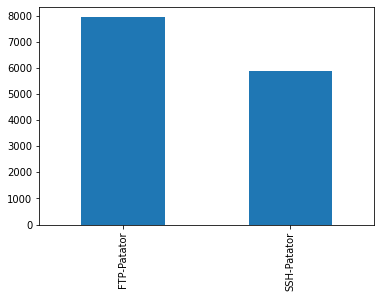

In [ ]:
df[df[" Label"] != "BENIGN"][" Label"].value_counts().plot(kind='bar')

In [ ]:
np.unique(df[' Label'])

array(['BENIGN', 'FTP-Patator', 'SSH-Patator'], dtype=object)

In [ ]:
# Print the number of missing values in each column
print(df.isnull().sum())

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [ ]:
# Print the shape of the filtered dataset
df.shape

(445909, 79)

In [ ]:
# Remove rows with missing values
df = df.dropna()

In [ ]:
df.shape

(445708, 79)

In [ ]:
#drop na values and reset index
df_clean = df.dropna().reset_index()


In [ ]:
from sklearn.preprocessing import  LabelEncoder

In [ ]:
# label encoding
labelencoder = LabelEncoder()
df_clean[' Label'] = labelencoder.fit_transform(df_clean[' Label'])
df_np = df_clean.to_numpy(dtype="float32")

In [ ]:
#drop inf values
df_np = df_np[~np.isinf(df_np).any(axis=1)]


In [ ]:
X = df.drop(' Label', axis=1)
y = df[' Label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Identify the indices of the rows that contain infinite or large values
inf_or_large = np.isinf(X_train) | (np.abs(X_train) > 1e9)

# Replace the infinite or large values with the mean of the feature
X_train[inf_or_large] = np.nan
X_train = np.nan_to_num(X_train, nan=np.nanmean(X_train, axis=0))

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# Print the minimum and maximum values before replacing the infinite or large values
print(f"Before replacing: min = {np.min(X_test)}, max = {np.max(X_test)}")

# Replace the infinite or large values
inf_or_large = np.isinf(X_test) | (np.abs(X_test) > 1e9)
X_test[inf_or_large] = np.nan
X_test = np.nan_to_num(X_test, nan=np.nanmean(X_test, axis=0))

# Print the minimum and maximum values after replacing the infinite or large values
print(f"After replacing: min = {np.min(X_test)}, max = {np.max(X_test)}")

Before replacing: min =  Destination Port              0.0
 Flow Duration                -4.0
 Total Fwd Packets             1.0
 Total Backward Packets        0.0
Total Length of Fwd Packets    0.0
                              ... 
 Active Min                    0.0
Idle Mean                      0.0
 Idle Std                      0.0
 Idle Max                      0.0
 Idle Min                      0.0
Length: 78, dtype: float64, max =  Destination Port                  65389.0
 Flow Duration                 119999977.0
 Total Fwd Packets                177702.0
 Total Backward Packets           228838.0
Total Length of Fwd Packets       877610.0
                                  ...     
 Active Min                     72400000.0
Idle Mean                      120000000.0
 Idle Std                       75900000.0
 Idle Max                      120000000.0
 Idle Min                      120000000.0
Length: 78, dtype: float64
After replacing: min = -536870661.0, max = 731000000.0


In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Build and evaluate the SVM model
svm_model = SVC(kernel='linear')


In [ ]:
from time import time

In [ ]:
t0 = time()
svm_model.fit(X_train, y_train)
t1 = time()
training_time = t1 - t0
t0 = time()
svm_predictions = svm_model.predict(X_test)
t1 = time()
testing_time = t1 - t0
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
print("Training time:", training_time)
print("Testing time:", testing_time)

Training time: 459.2594599723816
Testing time: 27.74958086013794


In [ ]:
# Calculate the training accuracy
training_accuracy = svm_model.score(X_train, y_train)

# Calculate the testing accuracy
testing_accuracy = svm_model.score(X_test, y_test)

print("Training accuracy:", training_accuracy)
print("Testing accuracy:", testing_accuracy)


Training accuracy: 0.9928849077029217
Testing accuracy: 0.9923380673532117


In [ ]:
print(f'SVM Accuracy: {svm_accuracy:.3f}')
print(f'SVM Confusion Matrix:')
print(svm_confusion_matrix)

SVM Accuracy: 0.992
SVM Confusion Matrix:
[[86290    49     0]
 [    5  1608     0]
 [  625     4   561]]


In [ ]:


conf_mx = confusion_matrix(y_test, svm_predictions)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall_svm = TP/(TP+FN)
precision_svm = TP/(TP+FP)

print (recall_svm, precision_svm)

TN:  86290
FP:  49
FN:  5
TP:  1608
0.9969001859888407 0.9704284852142426


In [ ]:
F1_score_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)
print(F1_score_svm)

0.9834862385321101


In [ ]:
# Build and evaluate the RF model
rf_model = RandomForestClassifier(n_estimators=100)
t0 = time()
rf_model.fit(X_train, y_train)
t1 = time()
training_time = t1 - t0
t0 = time()
rf_predictions = rf_model.predict(X_test)
t1 = time()
testing_time = t1 - t0
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Training time:", training_time)
print("Testing time:", testing_time)

Training time: 49.37602925300598
Testing time: 0.7877974510192871


In [ ]:
print(f'RF Accuracy: {rf_accuracy:.3f}')
print(f'RF Confusion Matrix:')
print(rf_confusion_matrix)

RF Accuracy: 1.000
RF Confusion Matrix:
[[86339     0     0]
 [    1  1612     0]
 [    2     0  1188]]


In [ ]:
# Calculate the training accuracy
training_accuracy = rf_model.score(X_train, y_train)

# Calculate the testing accuracy
testing_accuracy = rf_model.score(X_test, y_test)

print("Training accuracy:", training_accuracy)
print("Testing accuracy:", testing_accuracy)


Training accuracy: 1.0
Testing accuracy: 0.9999663458302483


In [ ]:


conf_mx = confusion_matrix(y_test, rf_predictions)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall_rf = TP/(TP+FN)
precision_rf = TP/(TP+FP)

print (recall_rf, precision_rf)

TN:  86339
FP:  0
FN:  1
TP:  1612
0.9993800371977681 1.0


In [ ]:
F1_score_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
print(F1_score_rf)

0.9996899224806202
